<a href="https://colab.research.google.com/github/samuelkb/gColab/blob/main/notebooks/Implementing%20gradient%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Log-loss vs Mean Squared Error

We already studied the log-loss, but there are many other error functions used for neural netoworks. We will review one more called **Mean squared error**. 

As its name says, this one is the man of the squares of the differences between the predictions and the labels.

In this notebook we will implementing backpropagation with this new function on the same student admissions dataset.

### Gradient descent with Squared Errors

We want to find the weights for our neural networks. Let's start by thinking about the goal. The network needs to make predictions as close as possible to the real values. To measure this, we use a metric of how wrong the predictions are, the **error**. A common metric is the sum of the squared errorrs (SSE):

$$
E = \frac{\mathrm{1} }{\mathrm{2} }\ \sum_{\mu} \sum_{j} [y_j^{\mu} - \hat{y}_j^{\mu}]^2\
$$

Where $\hat{y}$ is the prediction and $y$ is the true value, and you take the sum over all output units $j$ and another sum over all data point $\mu$. This might seem like a really complicated equation at first, but it's fairly simple once you understand the symbols and can saw what's going on in words.

First, the inside summ over $j$. This variable $j$ represents the output units of the network. So this inside sum is saying for each output unit, find the difference between the true value $y$ and the predicted value from the network $\hat{y}$, then square the difference then sum up all those squares.

Then the other sum over $\mu$ is a sum over all the data points. So, for each data point you calculate the inner sum of the squared differences for each output unit. Then you sum up those squared differences for each data point. That gives you the overall error for all the output predictions for all the data points.

The SSE is a good choice for a few reasons. The square ensures the error is always positive and larger errors are penalized more than smaller errors. Also, it makes the math nice, always a plus.

Remember that the output of a neural network, the prediction, depends on the weights:
$$
\hat{y}_j^{\mu} =  f(\sum_{i} w_{ij}·x_i^{\mu})
$$

And accordingly the error depends on the weights:
$$
E = \frac{\mathrm{1} }{\mathrm{2} }\ \sum_{\mu} \sum_{j} [y_j^{\mu} - f(\sum_{i} w_{ij}·x_i^{\mu})]^2\
$$

We want the network's prediction error to be as small as possible and the weights are the knobs we can use to make that happen. Out goal is to find weights $w_{ij}$ that minimize the squared error $E$. To do this with a neural network, typically you'd use **gradient descent**.

### Enter gradient descent

Before to continue with formulas, let's recover our methaphora about the mountain. We are on top of a error mountain and we want to get to the bottom of that mountain. 

We can do it step by step, we look arround us in all the possible directions we can go and find out which direction will get us to descend the most. We take a step in the best direction and we restart the process, we look arround us, and see in which directions we descend the most, and take a step in that direction. And we continue the process until we descend the mountain. Yeah, that algorithm is our gradient descent, used extensively in machine learning. 

The top of our maountain is the problem, and the buttom is the solution, so we take tiny steps in the correct direction that will get us to the solution. In this case, we want to change the weights in steps that reduce the error. Since the fastest way down a mountain is in the steepest direction, the steps taken should be in the direction that minimizes the error the most. We find that direction by calculating the gradient of the squared error.

**Gradient** is another term for rate of change or slope. If you need to bruch up on this concept, check out this [link](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient).

To calculate a rate of change, we turn to calculus, specifically derivatives. A derivative of a function $f(x)$ gives you another function $f'(x)$ that returns the slope of a $f(x)$ at point $x$. For example, consider $f(x) = x^2$. The derivative of $x^2$ is $f'(x) = 2x$. So, at $x = 2$, the slope is $f'(2) = 4$. Plotting this out, it looks like:

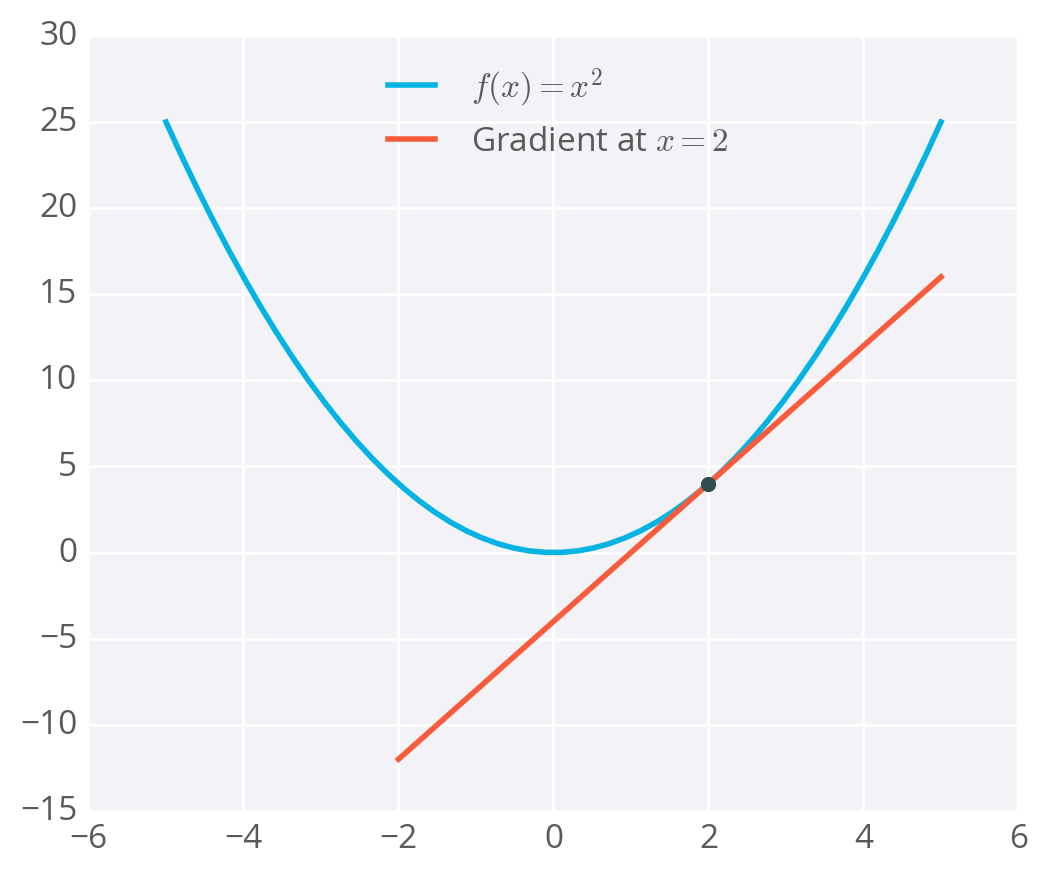

The gradient is just a derivative generalized to functions with more than one variable. We can use calculus to find the gradient at any point in our error function, which depends on the input weights. You'll see how the gradient descent step is derived later.

For now, let's see an example of the error of a neural network with two inputs, and accordingly, two weights. You can read this like a topographical map where points on a contour line have the same error and darker contour lines correspond to larger errors. 

At each step, you calculate the error and the gradient, then use those to determine how much to change each weight. Repeating this process will eventually find weights that are close to the minimum of the error function, the black dot in the middle.

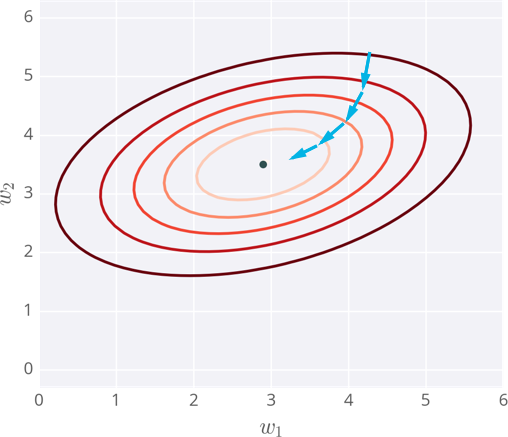

### Caveats

Since the weights will just go wherever the gradient takes them, they can end up where the error is low, but not the lowest. These spots are called **local minima**. If the weights are initialized with the wrong values, gradient descent could lead the weights into a local minimum: 

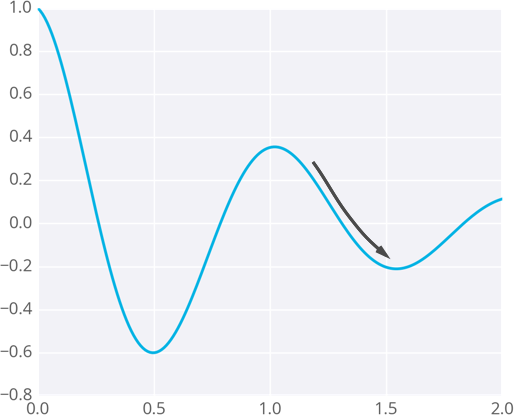

There are methods to avoid this, such as using **momentum**, you can read more about it [here](https://distill.pub/2017/momentum/).

### Gradient descent: The math

Now we know how to get an output from a simple neural network like the one shown I show you:

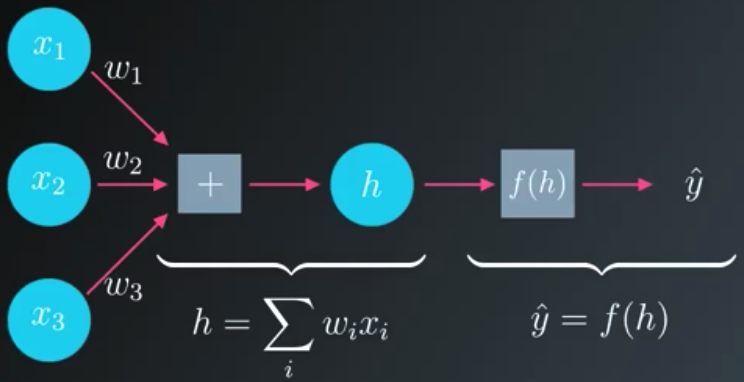

We would like to use the output to make predictions, but how do ve build this network to make predictions without knowing the correct weights before hand? What we can do is present it with data that we know to be true, then set the model parameters, the weights to match that data. 

First, we need some measure of how bad our predictions are. The obvious choice is to use the difference : $E = (y - \hat{y})$ (where $y \rightarrow$ true target value, and $\hat{y} \rightarrow$ the network output).

However, if the prediction is too high, this error will be negative and if their prediction is too low by the same amount the error will be positive. We would rather treat these errors the same. To make both cases positive we will just square the error: $E = (y - \hat{y})^2$. We don't take the absolute value, because one benefit of using the square is that it penalizes outliers more than small errors, also squaring the error makes the math nice later.

We have the error for just one prediction though. We would rather like to know the error for the entire dataset. So, we will just sum up the errors for each data record denoted by the sum over $\mu$:
$$
E = \sum_{\mu} ( y^{\mu} - \hat{y}^{\mu})^2
$$

Now, we have the total error for the network over the entire dataset. Finally, we will add a one half in front because it cleans up the math later. This formulation is typically called the sum of the squared errors:
$$
E = \frac{\mathrm{1} }{\mathrm{2} } \sum_{\mu} ( y^{\mu} - \hat{y}^{\mu})^2
$$

Remember that $\hat{y}$ is the linear combination of the weights and inputs passed through that activation function:
$$
E = \frac{\mathrm{1} }{\mathrm{2} } \sum_{\mu} ( y^{\mu} - f(\sum_{i}w_i · x_i^{\mu}))^2
$$

We can see that the error depends on the weights ($w_1$), and the input values ($x_i$). Remeber, $\mu$ are the data records.

You can think of data as two tables or arrays, or matrices, whatever works for you.

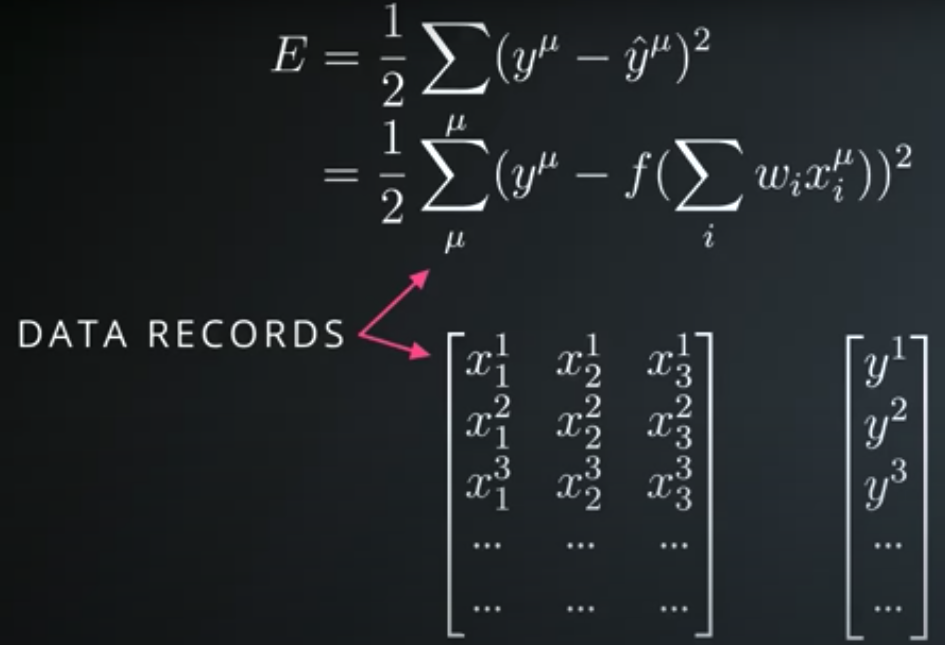

One contains the input data, x, and the other contains the targets, y.

Each record is one row here, so $\mu = 1$ is the first row. ($[x_1^1, x_2^1, x_3^1]  [y^1] \rightarrow \mu = 1$)

Then, to calculate the total error, you are just scanning through the rows of these arrays and calculating the SSE, then summing up all of those results.

The SSE is a measure of our network's performance. If it is high, the network is making bad predictions. If it is low, the network is making good predictions. So we want to make it as small as possible. 

Going forward, let's consider a simple example with only one data record to make it easier to understand how we will minimize the error. 

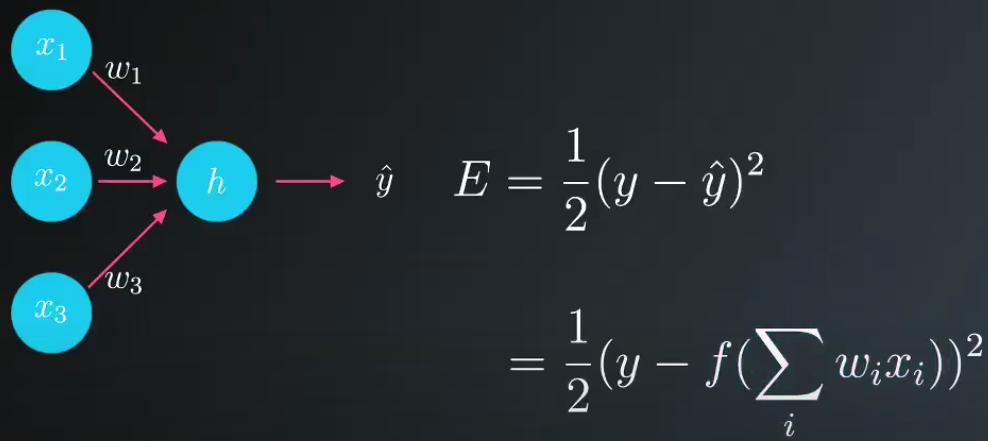

We have that the error is a function of the weights. 

The weights are the knobs we can use to alter the network's predictions which in turn affects the overall error. Then our goal is to find weights that mininize the error. 

Here we can see a simple depiction of the error with one weight. 

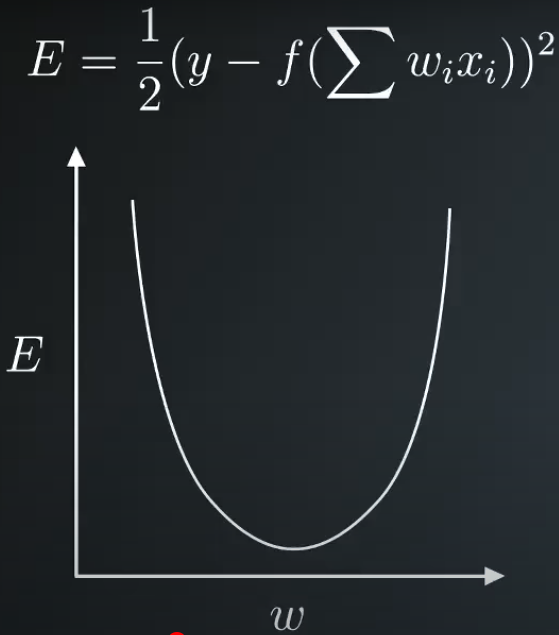

We want to find the weight at the bottom of this bowl.

Starting at some random weight, we want to make a step in the direction towards the minimum. This direction is the opossite to the gradient, the slope: $\Delta w = - gradient$. If we take many steps, always descending down a gradient, eventually the weight will find the minimum of the error function, it means, the gradient descent.

We want to update the weight:

$$
w_i = w_i + \Delta w_i
$$

So a new weight $w_1$ is the old weight plus the weight step $\Delta w_i$. Remember, $\Delta$ typically signifies change. 

The weight step is proportional to the gradient, the partial derivative of the error with respect to each weight:
$$
\Delta w_i \propto - \frac{\mathrm{\partial E} }{\mathrm{\partial w_i} }
$$

We can add in an arbitrary scaling parameter that allows us to set the size of the gradient descent steps, this is called the learning rate, signified by the Greek letter eta($\eta$):
$$
\Delta w_i = - \eta \frac{\mathrm{\partial E} }{\mathrm{\partial w_i} }
$$

Calculating the gradient here requires multivariable calculus, here a [link]() for your help. 

Writting out the gradient, you get th partial derivative with respect the weights of the SSE:

$$
\frac{\mathrm{\partial E} }{\mathrm{\partial w_i}} = \frac{\mathrm{\partial E} }{\mathrm{\partial w_i}} · \frac{\mathrm{1} }{\mathrm{2}} · (y - \hat{y})^2
$$

The network output is a function of weights, so we hav here a function of another function that depends on the weights:

$$
= \frac{\mathrm{\partial E} }{\mathrm{\partial w_i}} · \frac{\mathrm{1} }{\mathrm{2}} · (y - \hat{y}(w_i))^2
$$

So we use chain rule to calculate the derivative:

$$
\frac{\mathrm{\partial} }{\mathrm{\partial z}}p(q(z)) = \frac{\mathrm{\partial p} }{\mathrm{\partial q}} · \frac{\mathrm{\partial q} }{\mathrm{\partial z}}
$$

Where $q = (y - \hat{y}(w_i))$ and $p = \frac{\mathrm{1} }{\mathrm{2}}q(w_i)^2$, and the derivative of p with respect to q returns the error itself:

$$
\frac{\mathrm{\partial} E}{\mathrm{\partial w_i}} = (y - \hat{y}) · \frac{\mathrm{\partial} }{\mathrm{\partial w_i}} · (y - \hat{y})
$$

The $2$ in the exponent drops down and cancels out the $1/2$, then we are left with the derivative of the error with respect to $w_i$.

The target value $y$ doesn't depend on the weights, but $\hat{y}$ does. We use the chain rule again, the minus sign comes out in front and we are left with th partial derivative of $\hat{y}$

$$
= - (y - \hat{y}) · \frac{\mathrm{\partial} \hat{y}}{\mathrm{\partial w_i}}
$$


If we remember, $\hat{y}$ is equal to the activation function at $h$:

$$
\hat{y} = f(h)
$$

Where $h$ is the linear combination of the weights and input values:

$$
h = \sum_{i} w_i x_i
$$

Taking the derivate of $\hat{y}$ and again using the chain rule:

$$
= - (y - \hat{y})f'(h) · \frac{\mathrm{\partial}}{\mathrm{\partial w_i}} · \sum w_i x_i
$$

In the sum, there is only one term that depends on each weight, writing this out for weight one, we see that only the first term with $x_1$ depends on $w_1$:

$$
= \frac{\mathrm{\partial}}{\mathrm{\partial w_1}} [w_1 x_1 + w_2 x_2 + ... w_n x_n]
$$

Then, the partial derivative of the sum with respect to weight one is just $x_1$:

$$
= x_1 + 0 + 0 + 0...
$$

Then the partial derivative of this sum with respect to $w_1$ is just $x_1$:

$$
\frac{\mathrm{\partial}}{\mathrm{\partial w_i}} · \sum w_i x_i = x_1
$$

So we finally put all this together, the gradient of the squared error with respect to $w_i$ is the negative of the error times the derivative of the activation function at $h$ times the input value $x_i$:

$$
\frac{\mathrm{\partial E}}{\mathrm{\partial w_i}} = - (y - \hat{y}) · f'(h)x_i 
$$


Then, the weight step is a learning rate $\eta$ times the error, times the activation derivative, times the input value: 

$$
\Delta w_i = \eta (y - \hat{y}) f'(h)x_i 
$$

For convenience, we can define an error term $\delta$ as the error times the activation function derivative at $h$:

$$
\delta = (y - \hat{y})f'(h)
$$

Then, we can write our weight update as:

$$
w_i = w_i + \eta \delta x_i
$$

You might be working with multiple output units. You can think of this as just stacking the architecture from the single output network but connecting the input units to the new output units.

Now the total error would include the error of each outputs sum together:

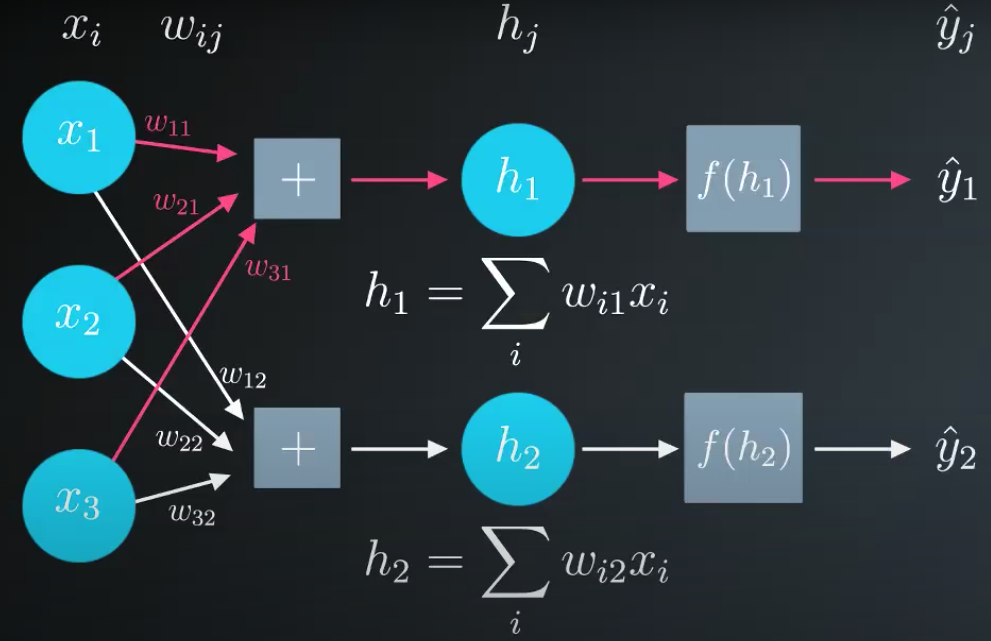

The gradient descent step can be extended to a network with multiple outputs by calculating an error term for each output unit denoted with the $_j$:

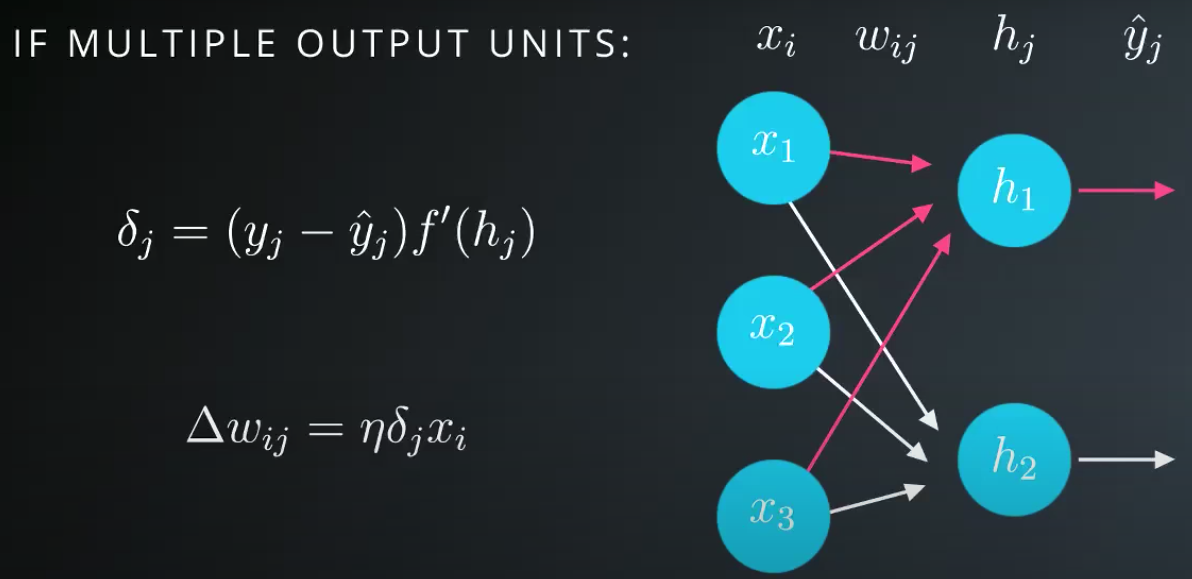

### Gradient descent: The code

Now that we know that we can calculate weights update with:

$$
\Delta w_i = \eta \delta x_i
$$

with the error term $\delta$ as:

$$
\delta = (y - \hat{y})f'(h) = (y - \hat{y})f'(\sum w_i x_i)
$$

where $(y - \hat{y})$ is the output error and $f'(h)$ is the derivative of the activation function $f(h)$, what we call the output gradient.

We will write this out in code for the case of only one input unit, using the sigmoid as the activation function:

In [2]:
import numpy as np

# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input data
x = np.array([0.1, 0.3])

# Target
y = 0.2

# Input to output weights
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.5

# The linear combination performed by the node (h in f(h) and f'(h))
h = x[0]*weights[0] + x[1]*weights[1] # or h = np.dot(x, weights)

# The neural network output (y-hat)
nn_output = sigmoid(h)

# Output error (y - y-hat)
error = y - nn_output

# Output gradient (f'(h))
output_grad = sigmoid_prime(h)

# Error term (lowercase delta)
error_term = error * output_grad

# Gradient descent step
del_w = [learnrate * error_term * x[0], learnrate * error_term * x[1]] # or del_w = learnrate * error_term * x

Remember that the derivative of the sigmoid function is: 
$$
\sigma '(x) = \frac{\mathrm{\partial} }{\mathrm{\partial x} } \frac{\mathrm{1} }{\mathrm{1 + e^{-x}} } = \frac{\mathrm{e^{-x}} }{\mathrm{(1 + e^{-x})^2 } } = \frac{\mathrm{e^{-x}} }{\mathrm{(1 + e^{-x})^2 } } · \frac{\mathrm{e^{-x}} }{\mathrm{(1 + e^{-x})^2 } } = \sigma(x)(1 - \sigma(x)) 
$$

You can find more datail about that derivative [here](https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x)

Now, let's implement a gradient descent in code, with a few differences from the example above:

In [4]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consolidated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
#h = x[0]*weights[0] + x[1]*weights[1] + x[2]*weights[2] + x[3]*weights[3]
h = np.dot(x, w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * sigmoid_prime(h)
# Note: The sigmoid_prime function calculates sigmoid(h) twice,
#       but you've already calculated it once. You can make this
#       code more efficient by calculating the derivative directly
#       rather than calling sigmoid_prime, like this:
# error_term = error * nn_output * (1 - nn_output)b

# TODO: Calculate change in weights
del_w = learnrate * error_term * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


### Implementing gradient descent

We have seen how to implement for a single update, but how do we translate that code to calculate many weight updates so our network will learn?

As an example, we can use gradient descent to train a network on graduate school admission data ([data found here](http://www.ats.ucla.edu/stat/data/binary.csv)). That dataset has three input features: GRE score, GPA, and the rank of the undergraduate school. Institutions with rank 1 have the highest prestige, those with rank 4 have the lowest.

In [5]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


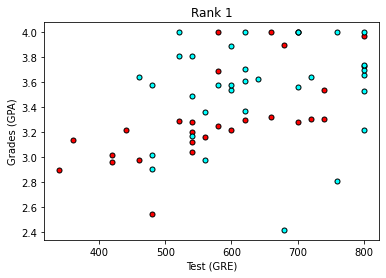

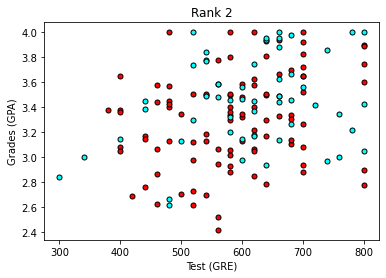

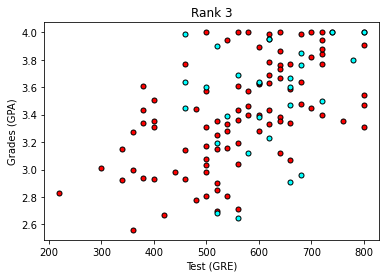

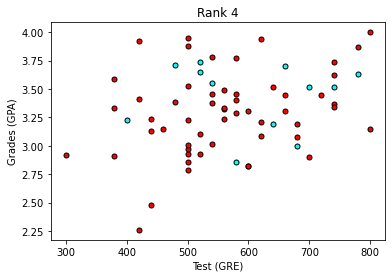

In [6]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

The goal here is to predict if a student will be admitted to a graduate program based on these features. For this, we will use a network with one output layer with one unit. We will use a sigmoid function for the output unit activation.

### Data cleanup

You might think there will be three input units, but we actually need to transform the data first. The `rank` feature is categorical, the numbers don't encode any sort of relative values. Rank 2 is not twice as much as rank 1, rank 3 is not 1.5 more than rank 2. Instead, we need to use [dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)) to encode `rank` splitting the data into four new columns encoded with ones or zeros. Rows with rank 1 have one in the rank 1 dummy column, and zeros in all other columns. Rows with rank 2 have one in the rank 2 dummy column, and zeros in all other columns. And so on.

We will also need to standaridize the GRE and GPA data, which means to scale the values such that they have zero mean and a standard derivation of 1. This is necessary because the sigmoid function squashes really small and really large inputs. The gradient of really small and large inputs is zero, which means that the gradient descent step will go to zero too. Since the GRE and GPA values are fairly large, we have to be really careful about how we initialize the weights or the gradient descent steps will die off and the network won't train. Instead, we if we standaridize the data, we can initialize the weights easily and everyone is happy.

In [8]:
admissions = pd.read_csv('student_data.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.iloc[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
209,0,-0.066657,0.289305,0,1,0,0
280,0,0.625884,1.445476,0,1,0,0
33,1,1.837832,1.603135,0,0,1,0
210,0,1.318426,-0.131120,0,0,0,1
93,0,-0.066657,-1.208461,0,1,0,0
84,1,-0.759199,0.552071,0,0,1,0
329,0,-0.759199,-1.208461,0,0,0,1
94,1,0.625884,0.131646,0,1,0,0
266,0,-0.239793,-0.393886,0,0,0,1
126,1,0.106478,0.394412,1,0,0,0


Now that the data is ready, we see that there are six input features: GRE, GPA, and the four rank dummy variables.

### Mean Square Error

We are going to make a small change to how we calculate the error here. Instead of the SSE, we are going to use the **mean** of the square errors (MSE). Now that we are using a lot of data, summing up all the weight steps can lead to really large updates that make the grdient descent diverge. To compensate for this, you would need to use a quite small learning rate. Instead, we can just divide by the number of records in our data, $m$ to take the average. This way, no matter how much date we use, our learning rates will typically be in the range of 0.01 to 0.001. Then, we can use the MSE to calculate the gradient and the result is the same as before, just averaged instead of summed:

$$
E = \frac{\mathrm{1} }{\mathrm{2 m} }\ \sum_{\mu} (y^{\mu} - \hat{y}^{\mu})^2\
$$

Here the general algorithm for updating the weights with gradient descent:
- Set the weight step to zero: $\Delta w_i = 0$
- For each record in the training data:
-- Make a forward pass through the network, calculating the output $\hat{y} = f(\sum_i w_i x_i)$
-- Calculate the error term for the output unit, $\delta = (y - \hat{y}) * f'(\sum_i w_i x_i)$
-- Update the weight step $\Delta w_i = \Delta w_i + \delta x_i $
- Update the weights $w_i = w_i + \eta \Delta w_i/m$ where $\eta$ is the learning rate and $m$ is the number of records. Here we are averaging the weight steps to help reduce any large variations in the training data.
- Repeat for $e$ epochs

You can also update the weights on each record instead of averaging the weight steps after going through all the records. 

Remember that we are using the sigmoid for the activation function, $f(h) = \frac{\mathrm{1} }{\mathrm{1 + e^{-h}} }$

And the gradient of the sigmoid is $f'(h) = f(h)(1 - f(h))$, where $h$ is the input to the output unit, $h = \sum_i w_i x_i$.

### Implementing with NumPy

For almost all this process, it is pretty straightforward with NumPy.

First, you need to initialize the weigths. We want these to be small such that the input to the sigmoid is in the linear region near 0 and not squashed at the high and low ends. It is also important to initialize them randomly so that they all have different starting values and diverge, breaking symmetry. So, we will initialize the weights from a normal distribution centered at 0. A good value for the scale is $1 / \sqrt[]n$ where $n$ is the number of input units.This keeps the input to the sigmoid low for increasing numbers of input units.

`weights = np.random.normal(scale = 1/n_features**.5, size = n_features)`

NumPy provides a function `np.dot()` that calculates the dot product of two arrays, which conviniently calculates $h$ for us. The dot product multiplies two arrays element-wise, the first element in array 1 is multiplied by the first element in array 2, and so on. Then, each product is summed.

`output_in = np.dot(weights, inputs)`

And finally, we can update $\Delta w_i$ and $w_i$ by incrementing them with `weights += ...` which is shorthand for `weights = weights + ...`

### Efficiency tip!

You can save some calculations since we are using a sigmoid here. For the sigmoid function, $f'(h) = f(h)(1 - f(h)$. That means that once you calculate $f(h)$, the activation of the output unit, you can use it to calculate the gradient for the error gradient.

So, our goal is to train the network until you reach a minimum in the mean square error (MSE) on the training set.
You will implement:
- The network output: `output`.
- The output error: `error`.
- The error term: `error_term`.
- Update the weight step: `del_w +=`.
- Update the weights: `weights +=`.


In [9]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Note: We haven't included the h variable from the previous
        #       lesson. You can add it if you want, or you can calculate
        #       the h together with the output

        # TODO: Calculate the output
        output = sigmoid(np.dot(x, weights))

        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate the error term
        error_term = error * output * (1 - output)

        # TODO: Calculate the change in weights for this sample
        #       and add it to the total weight change
        del_w += error_term * x

    # TODO: Update weights using the learning rate and the average change in weights
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.2627609384996635
Train loss:  0.20928619409324875
Train loss:  0.20084292908073426
Train loss:  0.19862156475527873
Train loss:  0.1977985139668603
Train loss:  0.19742577912189863
Train loss:  0.1972350774624106
Train loss:  0.1971294562509248
Train loss:  0.19706766341315082
Train loss:  0.19703005801777368
Prediction accuracy: 0.725


### Multilayer perceptrons

At the begining (on [this notebook](https://github.com/samuelkb/gColab/blob/main/notebooks/Introduction%20to%20neural%20networks.ipynb)), we saw with the XOR perceptron that adding a second layer of units allows the model to find solutions to linearly inseparable problems. 

So we have an example of a multilayer perceptron with 3 input units, one output unit and two units in the middle, which is called the hidden layer:

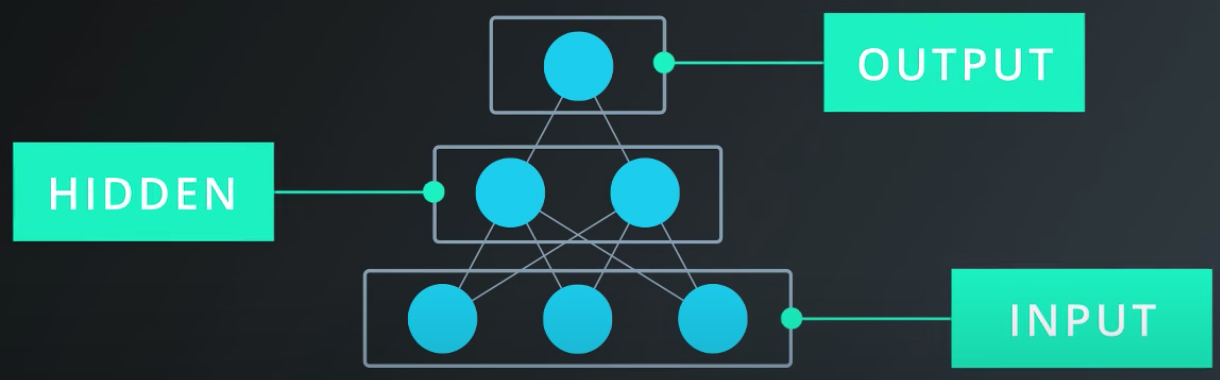

Calculating the output of this network is the same as before, except that now the activations of the hidden layer are used as the input to the output layer, the input to the hidden layer is the same as before. It's these weights times the input values plus some bias term:

$$
h_j = \sum_{i} w_{ij} * x_i +b_j
$$

And as before, again we use an activation function such as a sigmoid to calculate the output of the hidden layer:

$$
a_j = sigmoid(h_j)
$$

The hidden layer activations are passed to the output layer through the second set of weights and again using an activation function we get the output of the network:

$$
o_k = sigmoid(\sum_{j}w_jk * a_j + b_j)
$$

Stacking more and more layers like this, helps the network learn more complex patterns. This is where deep learning gets its name from, and what makes it so powerful. Deep stacks of hidden layers.

### Implementing the hidden layer

We are going to walk through the math of neural networks in a multilayer perceptron. With multiple perceptrons, we are going to move to using vectors and matrices. You can find more info here:
- [Introduction to vectors](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/vector-introduction-linear-algebra)
- [Introduction to matrices](https://www.khanacademy.org/math/precalculus/precalc-matrices)

We were dealing before with only one output node which made the code straightforward. However, now that we have multiple input units and a multiple hidden units, the weights between them will require two indices: $w_{ij}$ where $_i$ denotes input units and $_j$ are the hidden units.

For example, the following image shows our network, with its input units labeled $x_1, x_2$ and $x_3$, and its hidden nodes labeled $h_1$ and $h_2$:

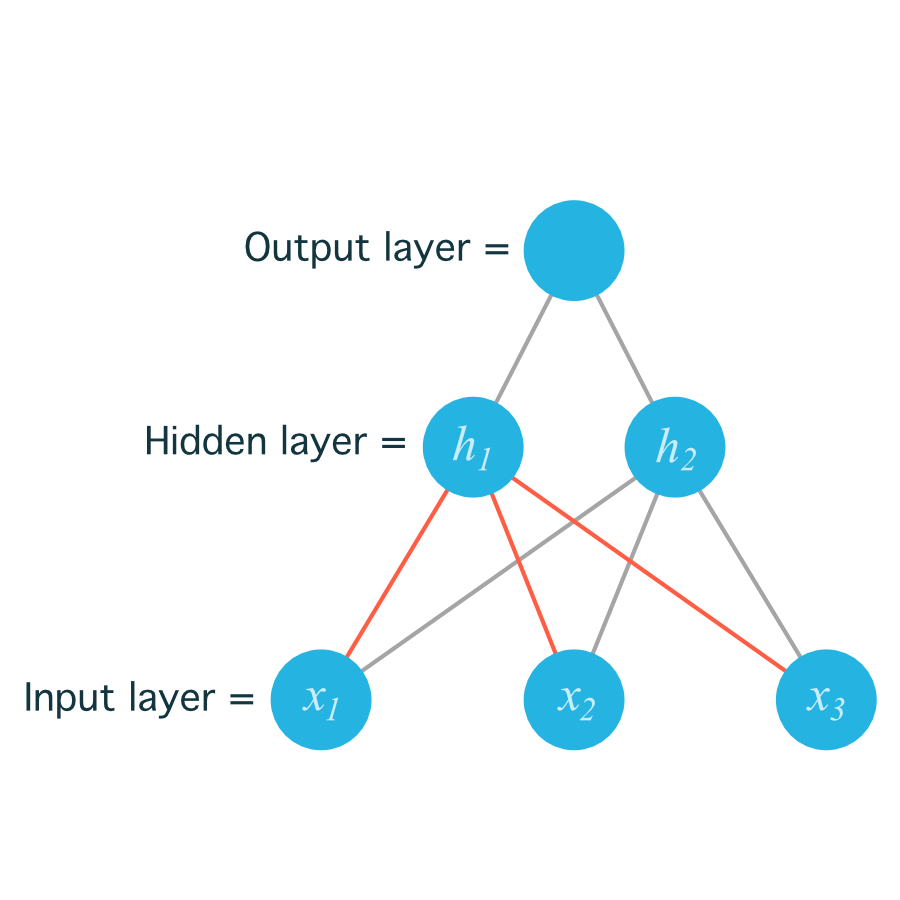

The lines indicating the weights leading to $h_1$ have been colored differently from those leading to $h_2$ just to make it easier to read. 

Now to index the weights, we take the input unit number for the $_i$ and the hidden unit number for the $_j$. That gives us $w_{11}$ for the weight leading from $x_1$ to $h_1$, and $w_{12}$ for the weight leading form $x_1$ to $h_2$. As is shown here:

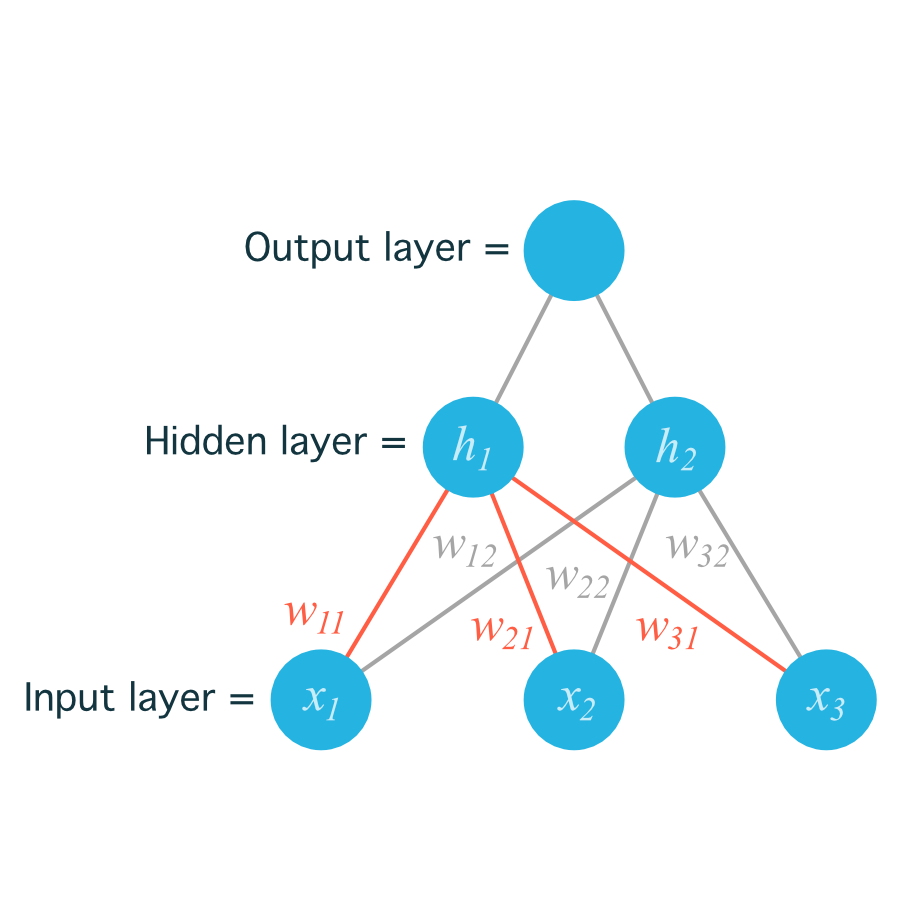

Before, we were able to write the weights as an array, indexed as $w_i$. But now, the weights need to be stored in a **matrix**, indexed as $w_{ij}$. Each **row** in the matrix will correspond to the weights **leading up** of a **single input unit**, and each **column** will correspond to th weights **leading in** to a **single hidden unit**. For our three input units and two hidden units, the weights matrix looks like this:

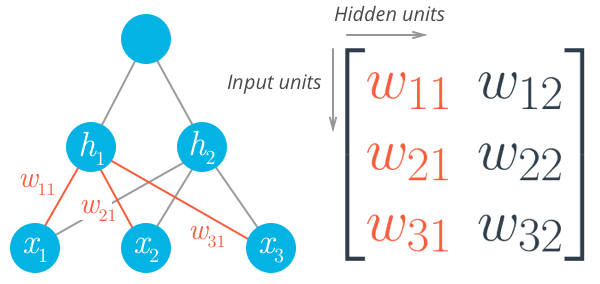

To initialize these weights in NumPy, we have to provide the shap of the matrix. If `features` is a 2D array containing the input data:

In [10]:
import numpy as np
features = np.array([[1,2],[3,4]])

#Number of records and input units
n_records, n_inputs = features.shape

#Nuber of hidden units
n_hidden = 2

weights_input_to_hidden = np.random.normal(0, n_inputs**-0.5, size=(n_inputs, n_hidden))

This creates a 2D array (matrix) named `weights_input_to_hidden` with dimensions `n_inputs` by `n_hidden`. Remember how the input to a hidden unit is the sum of all the inputs multiplied by the hidden unit's weights. So for each hidden layer unit, $h_j$, we need to calculate the following:

$$
h_j = \sum_{i} w_{ij}x_i
$$

To do that, we use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication). In this case, we are multiplying the inputs (a row vector here) by the weights. To do it, we take the dot (inner) product of the inputs with each column in the weights matrix. For example, to calculate the input to the first hidden unit, $_j = 1$, we would take the dot product of the inputs with the first column of the weights matrix, like so:

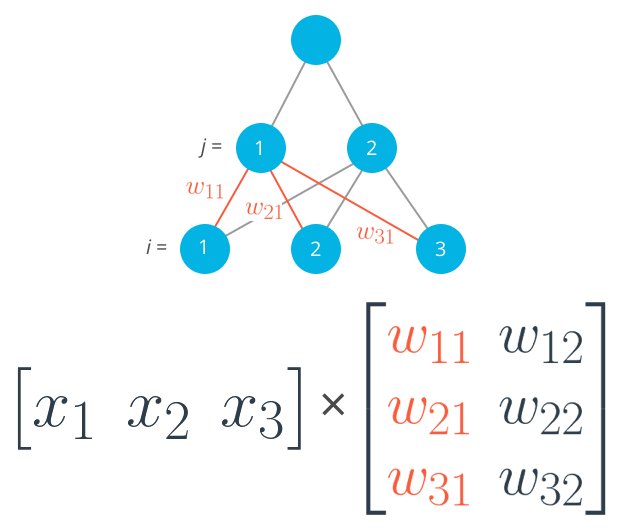

$$
h_1 = x_1w_{11} + x_2w_{21} + x_3w_{31}
$$

And for the second hidden layer input, we calculate the dot product of the inputs with the second column. And so on and so forth.

In NumPy we can do this for all the inputs and all the outputs at once usig `np.dot`:

`hidden_inputs = np.dot(inputs, weights_input_to_hidden)`

We could also define our weights matrix such that it has dimensions `n_hidden` by `n_inputs` then multipy like so where the inputs form a column vector:

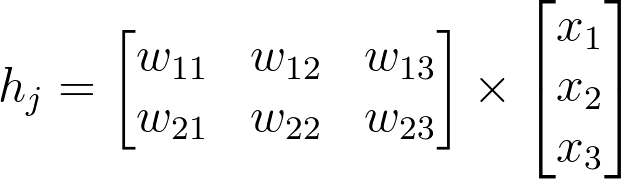

The weight indices have changed in the above image and no longer match up with the labels used in the earlier diagrams. That's because, in matrix notation, the row index always precedes the column index, so it would be misleading to label them the way we did in the neural net diagram. Just keep in mind that this is the same weight matrix as before, but rotated so the first column is now the first row, and the second column is now the second row. If we were to use the labels from the earlier diagram, the weights would fit into the matrix in the following locations:

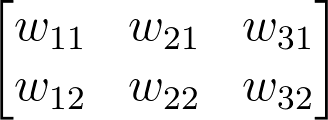

Remember, the above is **not** a correct view of the **indices**, but it uses the labels from the earlier nerial net diagrams to show us where each weight ends up in the matrix.

The important thing with matrix multiplication is that the dimensions match. For matrix multiplication to work, there has to be the same number of elements in the dot products. In the first example, there are three columns in the input vector, and three rows in the weights matrix. In the second example, there are treee columns in the weights matrix and three rows in the input vector. 

The rule is that if you are multiplying an array from the left, the array must have the same number of elements as there are rows in the matrix. And if you are multiplying the matrix from the left, the number of columns in the matrix must equal the number of elements in the array on the right:

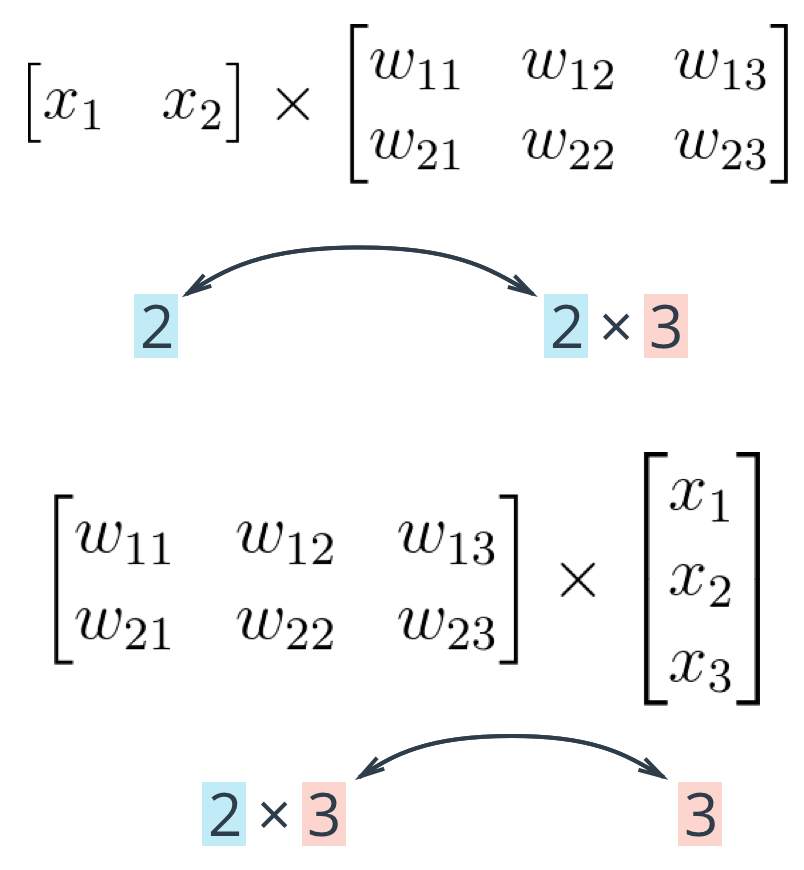

### Making a column vector

Sometimes we will want a column vector, even though by default NumPy arrays work like row vectors. It is possible to get the transpose of an array like so `arr.T`, but for a 1D array, the transpose will return a row vector. Intead, use `arr[:, None]` to creacte a column vector:

In [14]:
features_1d = np.array([ 0.49671415, -0.1382643 ,  0.64768854])
print(features_1d)

print("Simple transposing with features_1d.T:")
print(features_1d.T)

print("Using arr[:, None]")
print(features_1d[:, None])


[ 0.49671415 -0.1382643   0.64768854]
Simple transposing with features_1d.T:
[ 0.49671415 -0.1382643   0.64768854]
Using arr[:, None]
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


### Programming!

We will implement a forward pass through a 4x3x2 network, with sigmoid activation functions for both layers. So we have to do:
- Calculate the input to the hidden layer.
- Calculate the hidden layer output.
- Calculate the input to the output layer.
- Calculate the output of the network

In [15]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1 + np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)
print("Values for X:")
print(X)

print("Setting randomly our weights...")
weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network
print("Making forward pass through the net")
hidden_layer_in = np.dot(X, weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Values for X:
[ 0.49671415 -0.1382643   0.64768854  1.52302986]
Setting randomly our weights...
Making forward pass through the net
Hidden-layer Output:
[0.41492192 0.42604313 0.5002434 ]
Output-layer Output:
[0.49815196 0.48539772]


### Backpropagation

Now we are dealing with multiple layers and we would still like train the network with gradient descent. From before, we know how to calculate the error in the output node:

$$
\delta = (y - \hat{y}f'(h))
$$

We can use this error with gradient descent to train the hidden to outputs weights, but to train the input to hidden weights, we need to know the error caused by the units in the hidden layer. How do we find these errors to use in the gradient descent step? 

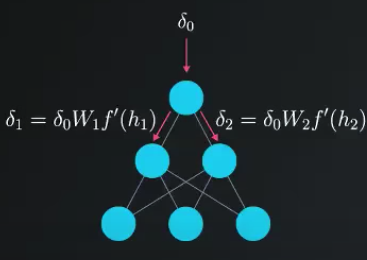

Before, we found the errors by taking the derivative of the squared errors with respect to the weights between the input  and output layers. If we do that with a hidden layer, using the chain rule, we find the error for units there is proportional to the error in the output layer times the weight between the unit. And that makes sense, a unit with a stronger connection to the output node is going to contribute more error to the final output.

Above we see the error times the weights, this is the same way you propagate inputs through the network, the inputs times the weights between the layers. Instead of propagating the inputs forward, you are propagating the error backwards through the network. Now, we can view this process as flipping the network over and using the error as the input, this method is called backpropagation, and this process works the same when you add more layers, we just keeo propagating the errors through the layers.

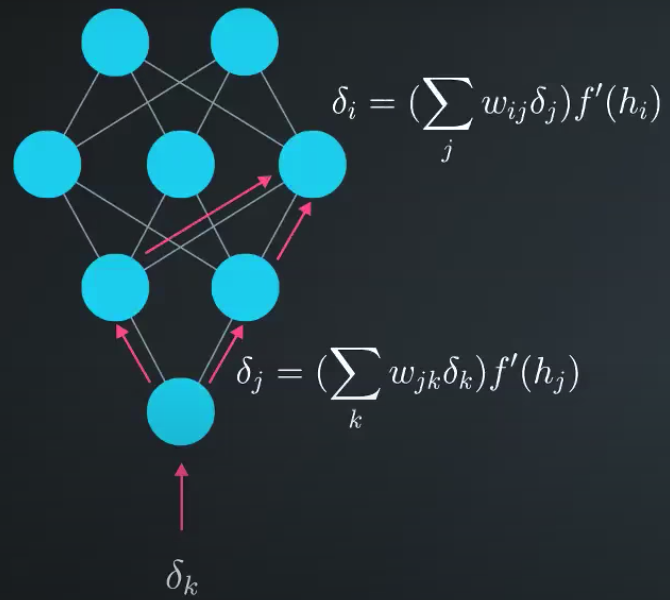

Backpropagation is fundamental to how neural networks learn.

Now we have come to the problem of how to make a multilayer neural network learn. Before, we saw how to update weights with gradient descent. The backpropagation algorithm is just an extension of that, using the chain rule to find the error with the respect to the weights connecting the input layer to the hidden layer.

To update the weights to hidden layers using gradient descent, you need to jnow how much error each of the hidden units contributed to the final output. Since the output of a layer is determined by the weights between layers, the error resulting from units is scaled by the weights going forward through the network. Since we know the error at the output, we can use the weights to work backwards to hidden layers.

For example, in the output layer, you have $\delta_k^o$ attributed to each output unit $k$. Then, the error attributed to hidden unit $j$ is the output errors, scaled by the weights between the output and hidden layers (and the gradient):

$$
\delta_j^h = \sum W_{jk}\delta_j^of'(h_j)
$$

Then, the gradient descent step is the same as before, just with the new errors:

$$
\Delta w_{ij} = \eta \delta_j^h x_i
$$

Where $w_{ij}$ are the weights between the inputs and hidden layer and $x_i$ are input unit values. This form holds for however many layers there are. The weight steps are equal to the step size times the output error of the layer times the values of the inputs to that layer:

$$
\Delta W_{pq} = \eta \delta_{output}V_{in}
$$

Here, you get the output error $\delta_{output}$ by propagating the errors backwards from higher layers. And the input values, $V_{in}$ are the inputs to the layer, the hidden layer activations to the output unit for example.

### Working through an example

Let's go through the steps of calculating the weight updates for a simple two layer network. Suppose there are two input values, one hidden unit, and one output unit, with sigmoid activations on the hidden and output units, as is shown in this image:

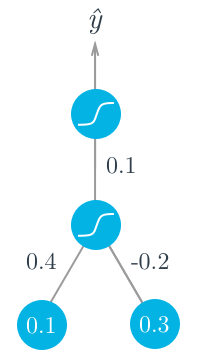

Assume we are trying to fit some binary data and the target is $y = 1$. We will start with the forward pass, first calculating the input to the hidden unit:

$$
h = \sum_i w_i x_i = 0.1 *x 0.4 - 0.2 * 0.3 = -0.02
$$

and the output of the hidden unit:

$$
a = f(h) = sigmoid(-0.02) = 0.495
$$

Using this as the input to the output unit, the output of the network is:

$$
\hat{y} = f(W · a) = sigmoid(0.1 x 0.495) = 0.512
$$


With the network output, we can start the backwards pass to calculate the weight updates for both layers. Using the fact that for the sigmoid function $f'(W · a) = f(W · a)(1 - f(W · a))$, the error term for the output unit is:

$$
\delta^o = (y - \hat{y})f'(W · a) = (1 - 0.512) * 0.512 * (1 - 0.512) = 0.122
$$

Now, we need to calculate the error term for the hidden unit with backpropagation. Here we will scale the error term from the output unit by the weight $W$ connecting it to the hidden unit. For the hidden unit error term, $\delta_j^j = \sum_k W_{jk} \delta_j^o f'(h_j)$, but since we have one hidden unit and one output unit, this is much simpler.

$$
\delta^h = W \delta^o f'(h) = 0.1 x 0.122 * 0.495 * (1 - 0.495) = 0.003
$$

Now that we have the errors, we can calculate the gradient descent steps. The hidden to output weight step is the lerning rate times the output unit error times the hidden unit activation value:

$$
\Delta W = \eta \delta^o a = 0.5 * 0.122 * 0.495 = 0.0302
$$

Then, for the input to hidden weights $w_i$, it is the learning rate times the hidden unit error times the input values:

$$
\Delta w_i = \eta \delta^o x_i = (0.5 * 0.003 * 0.1, 0.5 * 0.003 * 0.3) = (0.00012, 0.00045)
$$

For this example, you can see one of the effects of using the sigmoid function for the activations. The maximum derivative of the sigmoid function is 0.25, so the errors in the output layer get reduced by at least 75%, and errors in the hidden layer are scaled down by at least 93.75%. You can see that if you have a lot of layers, using sigmoid activation function will quickly reduce the weight steps to tiny values in layers near the input. This is known as the **vanishing gradient** problem. Later in the course you will learn about other activation functions that perform better in this regard and are more commonly used in modern network architectures.

### Implementing in NumPy

Again, for the most part you have everything you need ot implement backpropagation with NumPy. However, previously we were only dealing with error terms from one unit. Now, in the weight update, we have to consider the error for each unit in the hidden layer, $\delta_j$:

$$
\Delta w_{ij} = \eta \delta_j x_i
$$

Firstly, there will likely be a different number of input and hidden units, so trying to multiply the errors and the inputs as row vectors will throw an error `ValueError: operands could not be broadcast together with shapes (3,) (6,)`. Also, $w_{ij}$ is a matrix now, so the right side of the assignment must have the same shape as the left side. 

Luckly, NumPy takes care of this for us. If you multiply a row vector array with a column vector array, it will multiply the first element in the column by each element in the row vector and set that as the first row in a new 2D array. This continues for each element in the column vector, so you get a 2D array that has shape `(len(column_vector), len(row_vector))`.

In [2]:
# hidden_error*inputs[:,None]
array = ([[ -8.24195994e-04,  -2.71771975e-04,   1.29713395e-03],
       [ -2.87777394e-04,  -9.48922722e-05,   4.52909055e-04],
       [  6.44605731e-04,   2.12553536e-04,  -1.01449168e-03],
       [  0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,  -0.00000000e+00]])
print(array)

[[-0.000824195994, -0.000271771975, 0.00129713395], [-0.000287777394, -9.48922722e-05, 0.000452909055], [0.000644605731, 0.000212553536, -0.00101449168], [0.0, 0.0, -0.0], [0.0, 0.0, -0.0], [0.0, 0.0, -0.0]]


It turns out this is exactly how we want to calculate the weight update step. As before, if you have your inputs as a 2D array with one row, you can also do `hidden_error * inputs.T`, but that won't work if `inputs` is a 1D array.

### Backpropagation exercise

Let's implement the code to calculate one backpropagation update step for two sets of weights. Things to do:
- Calculate the network's output error
- Calculate the output layer's error term
- Use backpropagation to calculate the hidden layer's error term
- Calculate the change in weights (the delta weights) that result from propagating the errors back through the network.

In [3]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = target - output

# TODO: Calculate error term for output layer
output_error_term = error * output * (1 - output)

# TODO: Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output) * \
                    hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]
